In [81]:
import sklearn.linear_model
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

In [4]:
df = pd.DataFrame(
    {'jam_rating': [2,4,7,8,9],
     'jam_price': [1,2,3,4,5]
    }

)

df

,jam_price,jam_rating
0,1,2
1,2,4
2,3,7
3,4,8
4,5,9


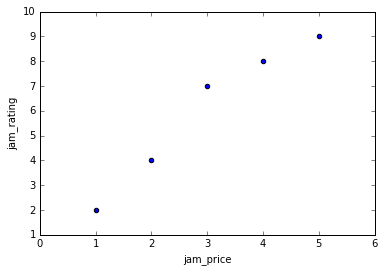

In [14]:
df.plot.scatter('jam_price', 'jam_rating')

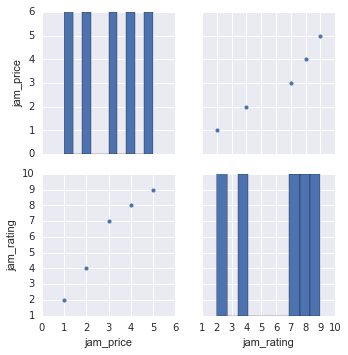

In [16]:
sb.pairplot(data=df)

# ransac

In [17]:
ransac = sklearn.linear_model.RANSACRegressor()

In [33]:
ransac.fit?

In [18]:
ransac.fit(df[['jam_price']], df.jam_rating)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [19]:
ransac.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### How did the two below receive the data?
A: It is a class

In [20]:
ransac.estimator_.coef_

array([ 1.8])

In [22]:
ransac.estimator_.intercept_

0.60000000000000053

In [23]:
ransac.predict([2.5])

/Users/allenbyron/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 5.1])

In [24]:
ransac.predict([[2.5], [3.5], [4.5]])

array([ 5.1,  6.9,  8.7])

In [26]:
predictions = ransac.predict(df[['jam_price']])
predictions

array([ 2.4,  4.2,  6. ,  7.8,  9.6])

##### What argument is predictions satisfying? 
A: predictions is a y value

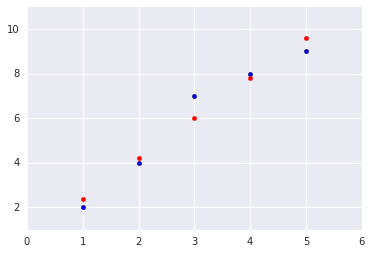

In [31]:
plt.scatter(df.jam_price, df.jam_rating)
plt.scatter(df.jam_price, predictions, color='red')

# theilsen

[(1, 2.034727287982228),
 (2, 4.0204735951594195),
 (3, 6.0062199023366105),
 (4, 7.9919662095138015),
 (5, 9.9777125166909943)]

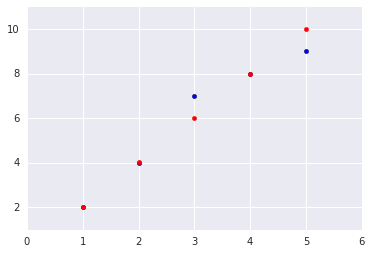

In [48]:
theilsen = sklearn.linear_model.TheilSenRegressor()
theilsen.fit(df[['jam_price']], df.jam_rating)
theilsen_predictions = theilsen.predict(df[['jam_price']])
plt.scatter(df.jam_price, df.jam_rating)
plt.scatter(df.jam_price, theilsen_predictions, color='red')
zip(df.jam_price, theilsen_predictions)

In [49]:
theilsen.coef_

array([ 1.98574631])

In [50]:
theilsen.intercept_

0.048980980805036732

[(1, 2.034727287982228),
 (2, 4.0204735951594195),
 (3, 6.0062199023366105),
 (4, 7.9919662095138015),
 (5, 9.9777125166909943)]

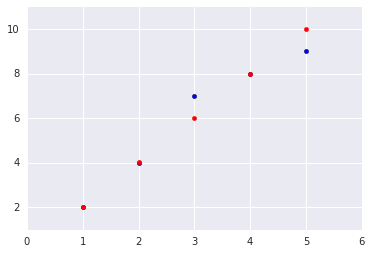

In [52]:
linear = sklearn.linear_model.LinearRegression()
linear.fit(df[['jam_price']], df.jam_rating)
linear_predictions = theilsen.predict(df[['jam_price']])
plt.scatter(df.jam_price, df.jam_rating)
plt.scatter(df.jam_price, linear_predictions, color='red')
zip(df.jam_price, linear_predictions)

In [53]:
linear.coef_

array([ 1.8])

In [2]:
linear.intercept_

NameError: name 'linear' is not defined

# Retail Data

In [4]:
sac = pd.read_csv('Sacramentorealestatetransactions.csv', index_col=0)
sac

,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
street,,,,,,,,,,,
3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555


In [7]:
sac.columns

Index([u'city', u'zip', u'state', u'beds', u'baths', u'sq__ft', u'type',
       u'sale_date', u'price', u'latitude', u'longitude'],
      dtype='object')

In [8]:
x = sac[['beds', 'baths', 'sq__ft', 'latitude', 'longitude']]

In [9]:
y = sac.price

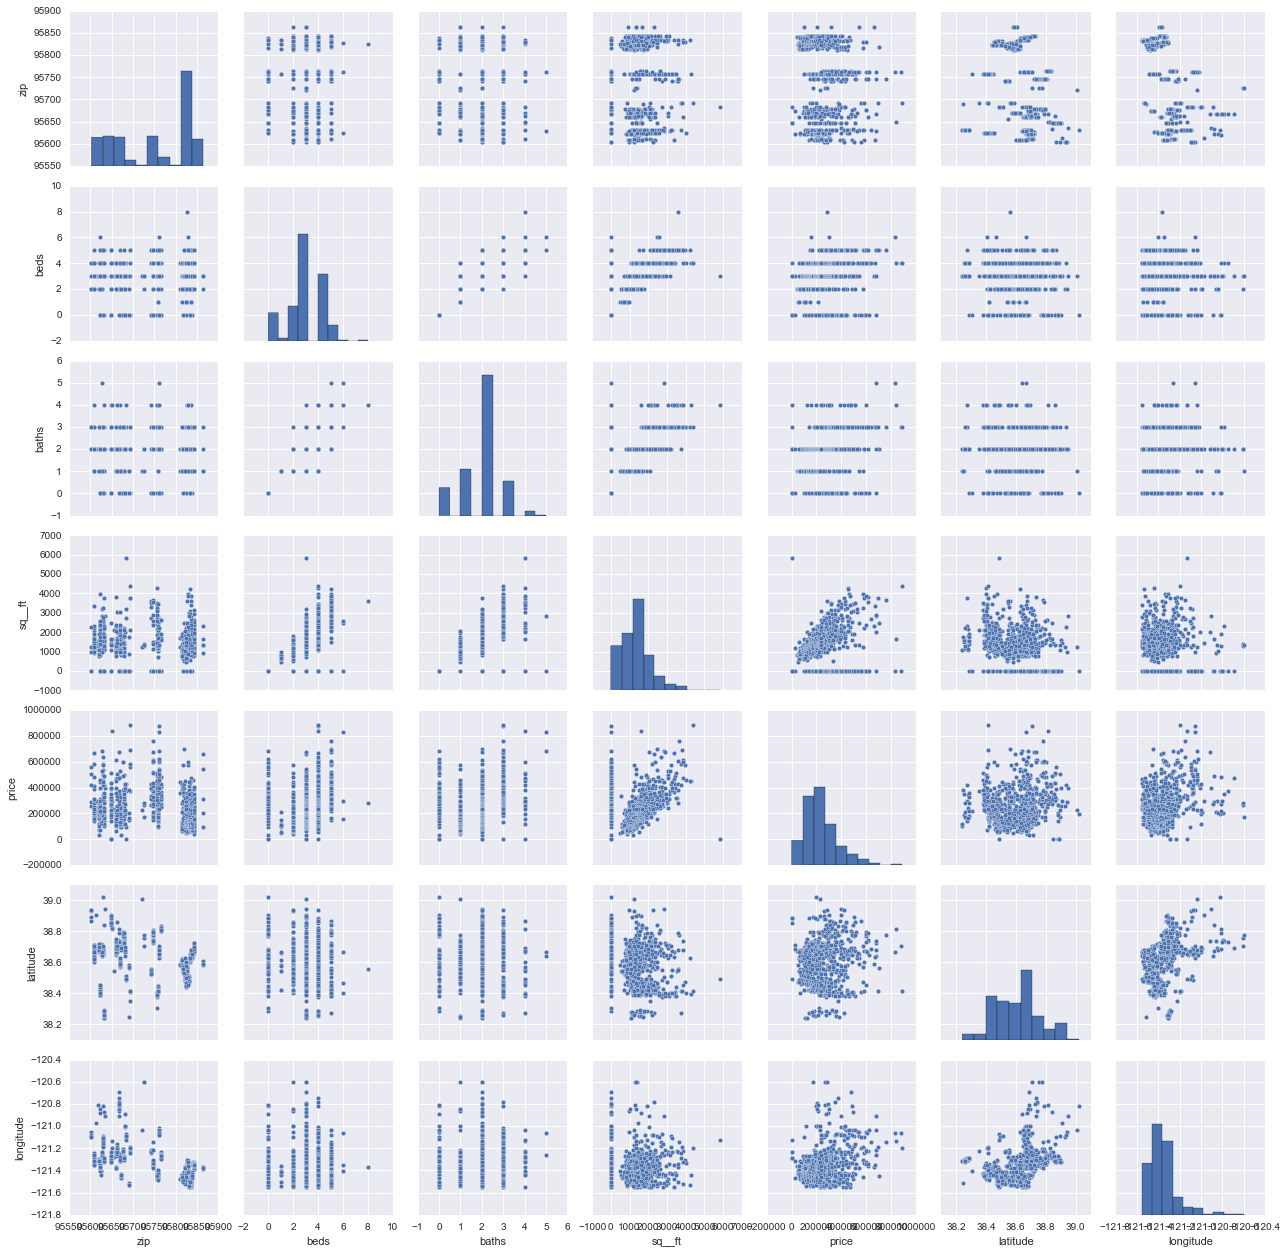

In [10]:
sb.pairplot(sac)

#### Are variables below calculated indpendently?
A: Yes

In [11]:
ols = sklearn.linear_model.LinearRegression()
ols.fit(x,y)
zip(['beds', 'baths', 'sq__ft', 'latitude', 'longitude'], ols.coef_)

[('beds', -5177.0604470801645),
 ('baths', 47018.317512635862),
 ('sq__ft', 34.440179386985008),
 ('latitude', -25449.69810008119),
 ('longitude', 325120.77173718967)]

#### The below retruns R^2

In [16]:
ols.score(x,y)

0.27428458034206682

#### The above indicates too much variance; perhaps cluster along city and zip? But first other models

In [19]:
t2 = sklearn.linear_model.TheilSenRegressor()
t2.fit(x,y)
zip(['beds', 'baths', 'sq__ft', 'latitude', 'longitude'], t2.coef_)

[('beds', 96983.087572367353),
 ('baths', 192750.26212959643),
 ('sq__ft', 99.999542682754026),
 ('latitude', -19802.73645947488),
 ('longitude', 211223.56703372809)]

In [20]:
t2.score(x,y)

-4.5857947524650768

In [23]:
r2 = sklearn.linear_model.RANSACRegressor()
r2.fit(x,y)
zip(['beds', 'baths', 'sq__ft', 'latitude', 'longitude'], r2.estimator_.coef_)

[('beds', -24216.675567791583),
 ('baths', 14661.220050016595),
 ('sq__ft', 172.81111658804772),
 ('latitude', 30147.03308351578),
 ('longitude', 57569.735735249531)]

#### Lasso will try to minimize certain values; need more desc.

In [25]:
lasso = sklearn.linear_model.Lasso(alpha=10000)
lasso.fit(x,y)
zip(['beds', 'baths', 'sq__ft', 'latitude', 'longitude'], lasso.coef_)

[('beds', 0.0),
 ('baths', 31413.877120481942),
 ('sq__ft', 32.195447112137231),
 ('latitude', 0.0),
 ('longitude', 0.0)]

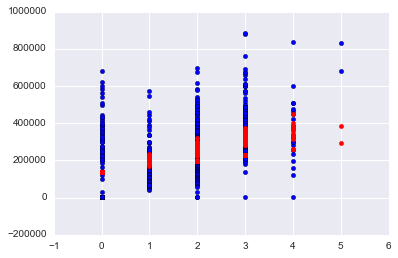

In [26]:
lasso_prediction = lasso.predict(x)
plt.scatter(sac.baths, sac.price)
plt.scatter(sac.baths, lasso_prediction, color='red')

In [27]:
sac.loc[sac.baths == 0]

,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
street,,,,,,,,,,,
17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032


# Non-Linearity Lab

Continue using real estate data. How can we improve on the above?

1. Split on North/South river
2. 2D map - are there any areas? -> Distance from center?
3. Clustering within individual zips?
4. Bed/bath ratio
5. Type in more detail

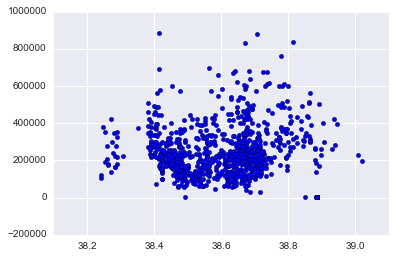

In [28]:
plt.scatter(sac.latitude, sac.price)

In [30]:
(sac.latitude < 38.35).value_counts()

False    962
True      23
Name: latitude, dtype: int64

#### Don't fully understand np.where

In [32]:
sac['river_south'] = np.where(sac.latitude < 38.35, 1,0)

In [33]:
x = sac[['beds', 'baths', 'sq__ft', 'latitude', 'river_south']]

In [34]:
ols.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Compare below scores to the above

In [41]:
zip(['beds', 'baths', 'sq__ft', 'latitude', 'river_south'], ols.coef_)

[('beds', -6375.7932221822393),
 ('baths', 59732.62003160431),
 ('sq__ft', 25.636370358523372),
 ('latitude', 103101.15075153642),
 ('river_south', 35265.362207874707)]

In [40]:
ols.score(x,y)

0.1891106916650378

In [38]:
plt.cm.Reds

ValueError: to_rgba: Invalid rgba arg "59222"
to_rgb: Invalid rgb arg "59222"
cannot convert argument to rgb sequence

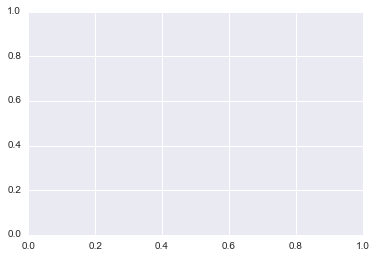

In [93]:
plt.scatter(sac.longitude, 
            sac.latitude, 
            color=sac.price_colored
           )

In [57]:
sac.price.median()

213750.0

In [58]:
sac.price.mean()

234144.26395939087

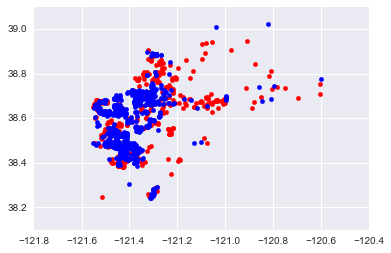

In [61]:
expensive_houses = sac[sac.price > 250000]
cheap_houses = sac[sac.price <= 250000]

plt.scatter(expensive_houses.longitude, 
            expensive_houses.latitude, 
            color='red'
           )

plt.scatter(cheap_houses.longitude, 
            cheap_houses.latitude, 
            color='blue'
           )

In [63]:
#38.6 long
#-121.2 lat

ne = (sac.latitude > 38.6) & (sac.longitude > -121.4)

In [64]:
sac['northeast'] = np.where(ne, 1,0)

In [65]:
data_columns = [
    
]

x = sac[data_columns]
ols.fit(x,y)
zip(data_columns, ols.coef_)

,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,river_south,northeast
street,,,,,,,,,,,,,
3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0
51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0
2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0
2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0
6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0
5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,0,1
6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,0,1
2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,0,0
11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,0,1


In [71]:
sac['postcode_region'] = sac.zip.map(lambda x: int(x/10))
sac.postcode_region.nunique()

19

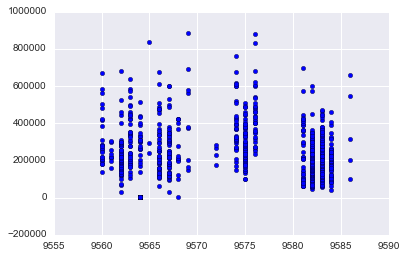

In [79]:
plt.scatter(sac.postcode_region, sac.price)

In [76]:
p9575 = sac[sac.postcode_region == 9575]
p9576 = sac[sac.postcode_region == 9576]

In [77]:
p9575.price.mean()

279833.65

In [78]:
p9576.price.mean()

447542.35294117645

In [82]:
ss.mannwhitneyu(p9575.price, p9576.price)

MannwhitneyuResult(statistic=433.5, pvalue=9.715491033027061e-09)

In [88]:
for pcode in sac.postcode_region.unique():
    for qcode in sac.postcode_region.unique():
        if pcode > qcode: continue
        p1 = sac[sac.postcode_region == pcode]
        p2 = sac[sac.postcode_region == qcode]
        print pcode, qcode, ss.mannwhitneyu(p1.price, p2.price)

9583 9583 MannwhitneyuResult(statistic=9522.0, pvalue=0.99939827210549359)
9583 9584 MannwhitneyuResult(statistic=4902.0, pvalue=0.099552917062326787)
9583 9586 MannwhitneyuResult(statistic=226.0, pvalue=0.19281277264676766)
9582 9583 MannwhitneyuResult(statistic=10942.0, pvalue=5.1690478132752676e-06)
9582 9582 MannwhitneyuResult(statistic=24642.0, pvalue=0.99970488486215303)
9582 9584 MannwhitneyuResult(statistic=5703.5, pvalue=0.039359070765150259)
9582 9586 MannwhitneyuResult(statistic=277.0, pvalue=0.056014098279253736)
9581 9583 MannwhitneyuResult(statistic=2853.0, pvalue=0.41504635920440458)
9581 9582 MannwhitneyuResult(statistic=5316.0, pvalue=0.49742254914723016)
9581 9581 MannwhitneyuResult(statistic=1012.5, pvalue=0.99677985549525205)
9581 9584 MannwhitneyuResult(statistic=1388.0, pvalue=0.96727973672142686)
9581 9586 MannwhitneyuResult(statistic=71.0, pvalue=0.18486451194795483)
9584 9584 MannwhitneyuResult(statistic=1922.0, pvalue=0.9980061091361162)
9584 9586 Mannwhitneyu

In [86]:
unusual_pcodes = [9582, 9583, 9567, 9574, 9562, 9566, 9576]

In [87]:
sac['bedbathratio'] = sac.beds / sac.baths